# Machine Learning 2020 Course 
## Protein Expression in Mice with Down Syndrome
### Author : Francesco Elli [Matricola: 943646, ID: 10753165]


In this [study](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0129126) the gene expression profile of 77 different proteins was measured in 8 different classes of mice. The aim was to assess the effect of these proteins on the learning process, especially in mice affected by Down Syndrome (DS).

Mice were divided in 8 classes based on 3 criteria:

1. Down syndrom (d) or control (c)
2. Context shock (CS) or shock context (SC)
3. memantine drug (m) or saline injection (s)

CS is the shock given after the mouse explores the cage, so the mouse learn by associating the context with the shock. SC is the shock given beforehand, so that the context should not be associated with the punishment.

Ideally, mice that learned are the c-CS, and the t-CS-m should rescue the ability thanks to the drug treatment, whereas the t-CS-s would fail to learn (controls). 




# 1. Preliminary analysis

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import scipy
import random

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

In [2]:
# Loading train and test datasets

train_data = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")


In [3]:
# Function to assign numeric values to the classes 

def class_num(x):
    if x['class'] == 'c-CS-s':
        return 0
    elif x['class'] == 'c-CS-m':
        return 1
    elif x['class'] == 'c-SC-s':
          return 2
    elif x['class'] == 'c-SC-m':
        return 3
    elif x['class'] == 't-CS-s':
        return 4
    elif x['class'] == 't-CS-m':
          return 5
    elif x['class'] == 't-SC-s':
          return 6
    else:
        return 7

train_data['class'] = train_data.apply(class_num, axis=1)
test['class'] = test.apply(class_num, axis=1)

# Remove class column from the train dataset
train_cluster = train_data.drop('class', axis=1)

## 1.a Feature Correlation 

### Heatmap

Plot heatmap to see the correlation between features. On rows and columns there are cells, so that the diagonal of the matrix is filled with the self-correlation value.

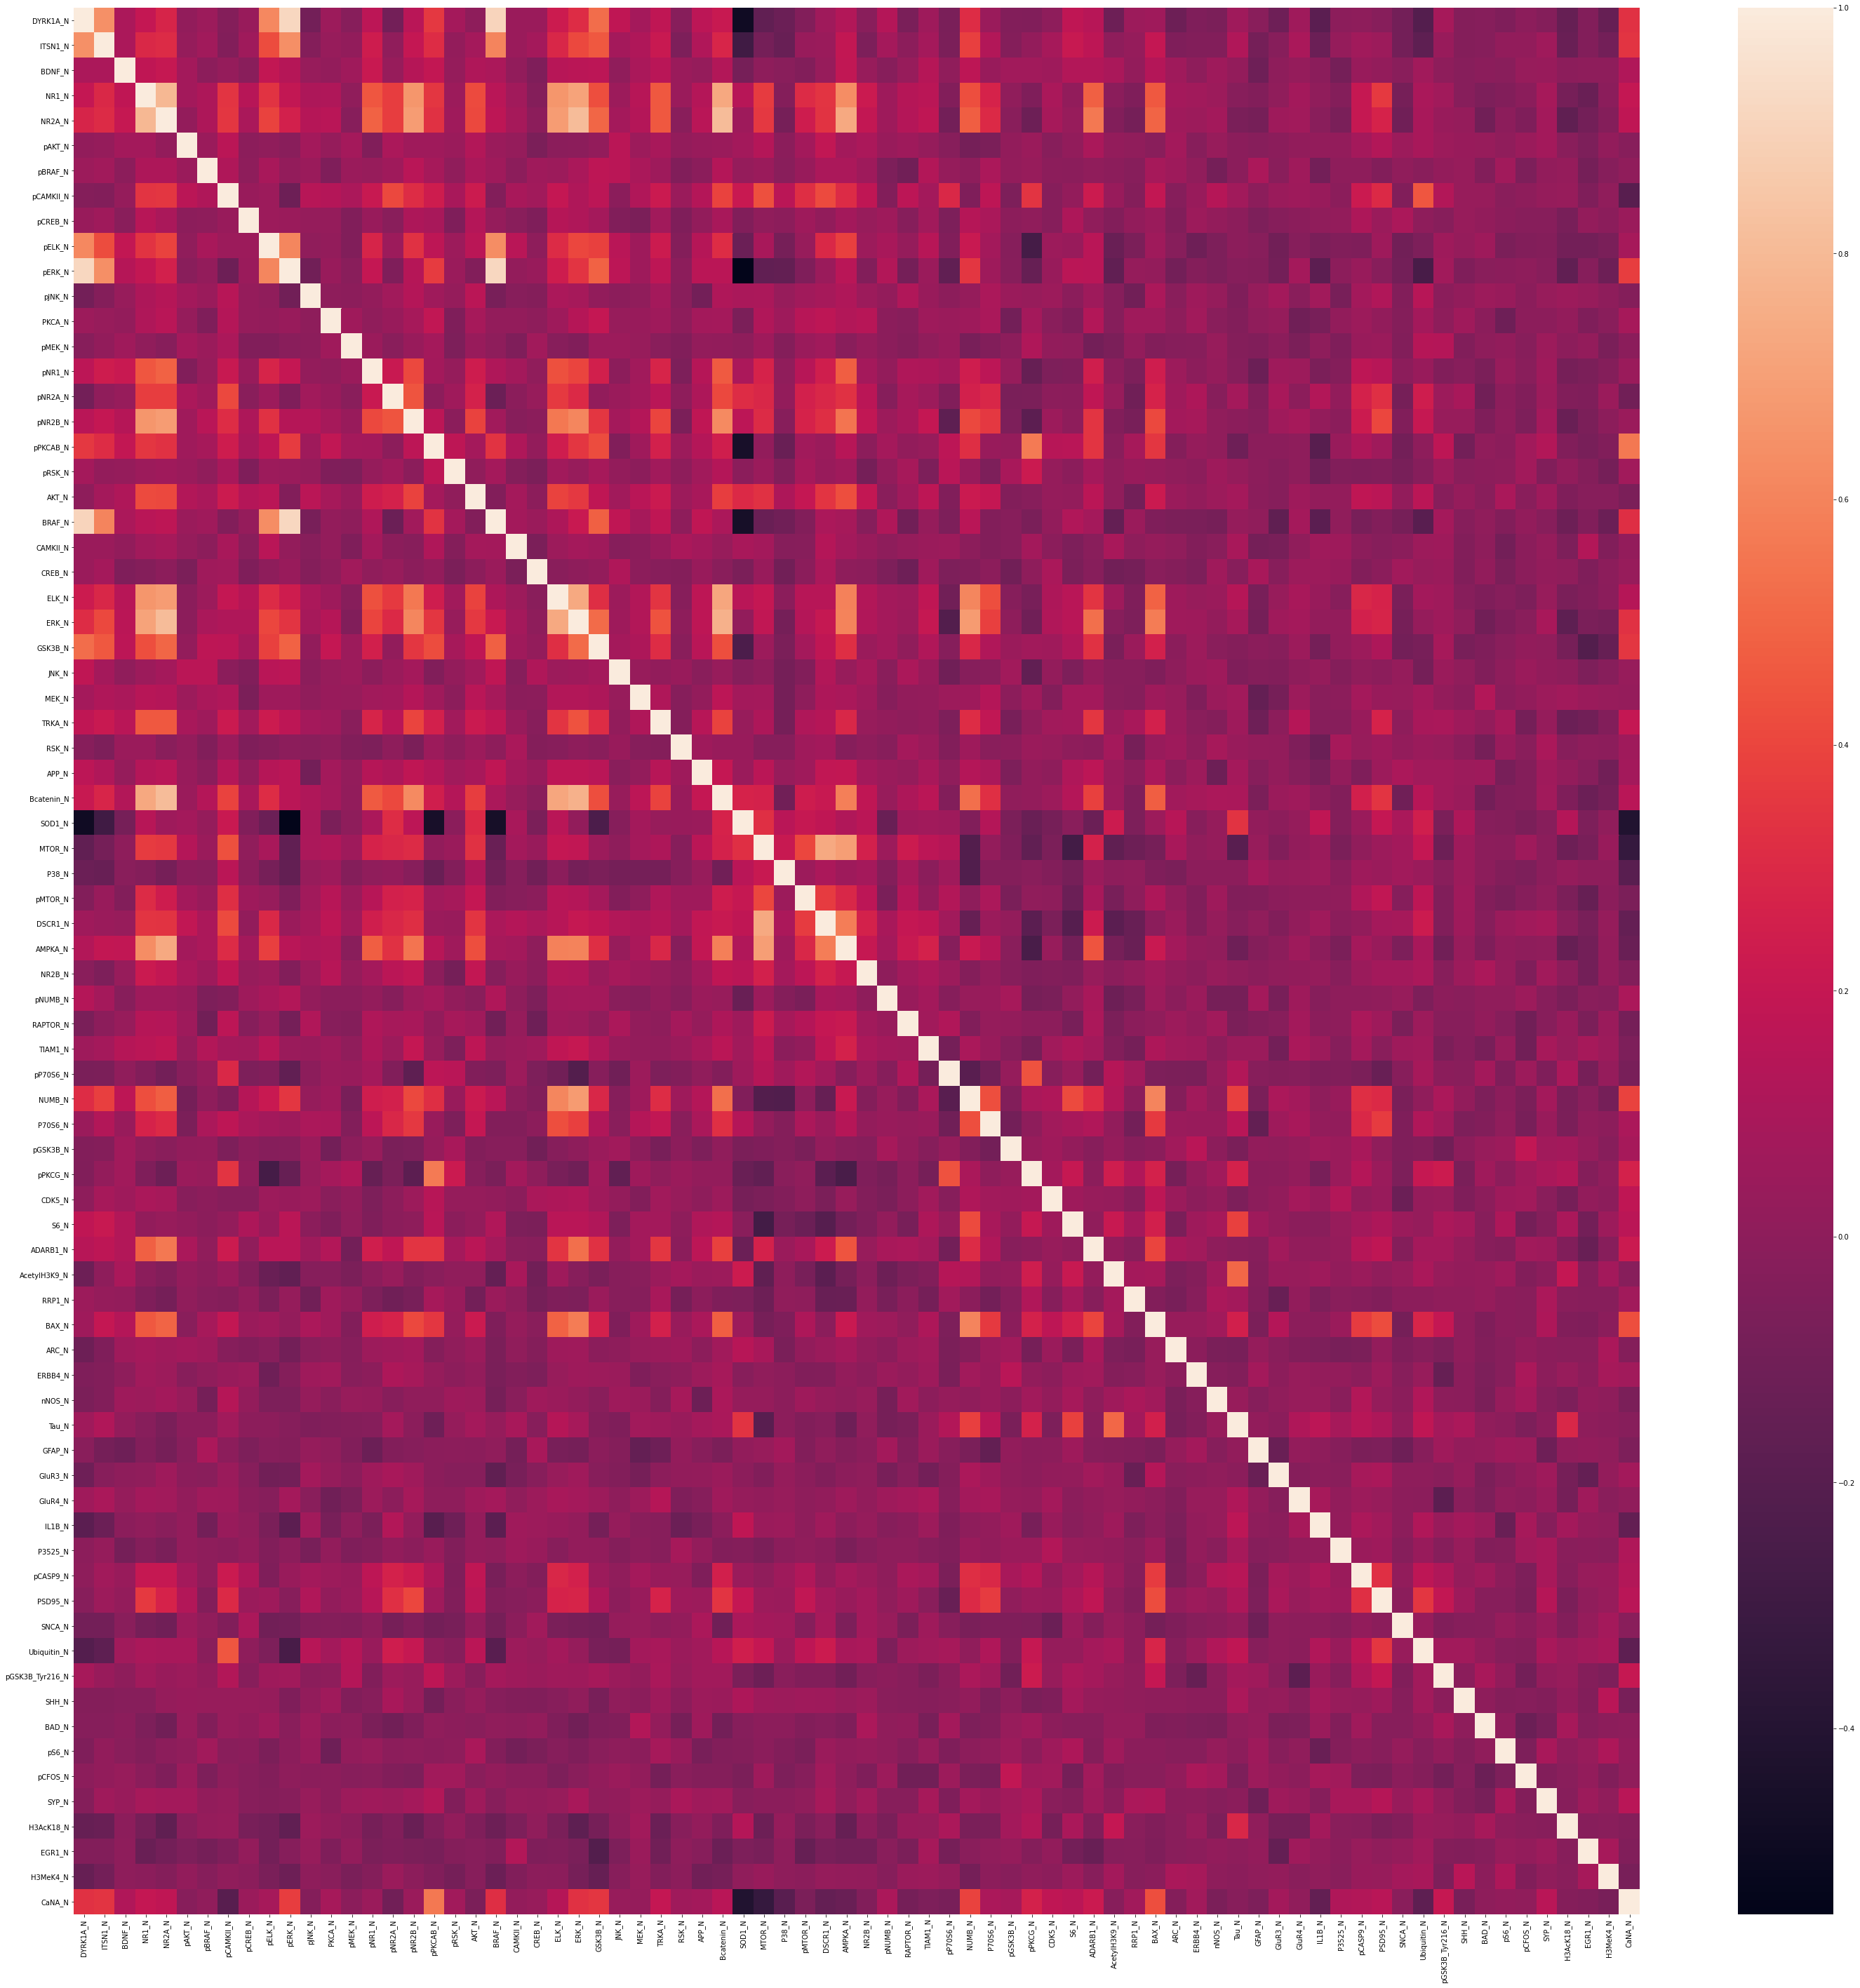

In [4]:
fig, ax = plt.subplots(figsize=(50,50))  
ax = sns.heatmap(train_cluster.corr())


### Pairplot

In the heatmap we can see that there are three features which correlates more than the others. Here a pairplot is shown to see more in detail the correlation.

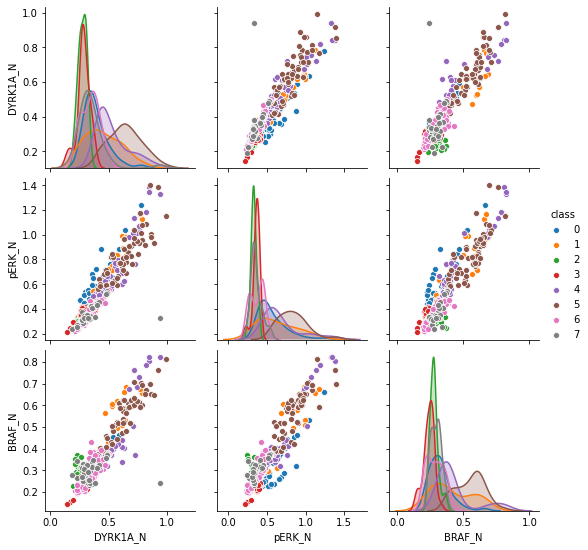

In [5]:
pd = train_data[['DYRK1A_N', 'pERK_N', 'BRAF_N', 'class']]
sns.pairplot(pd, hue='class')


### Clustermap 

Plot clustermap to see if the target classes are correlated to features (protein expressions). Each row is a sample and each column a protein. Samples are ordered according to the classes, showing which features are correlated to them.

In [6]:
# Sort the train dataset according to the target class

train_sorted = train_data.sort_values(by=['class'], axis=0)
train_sorted = train_sorted.drop('class', axis=1)

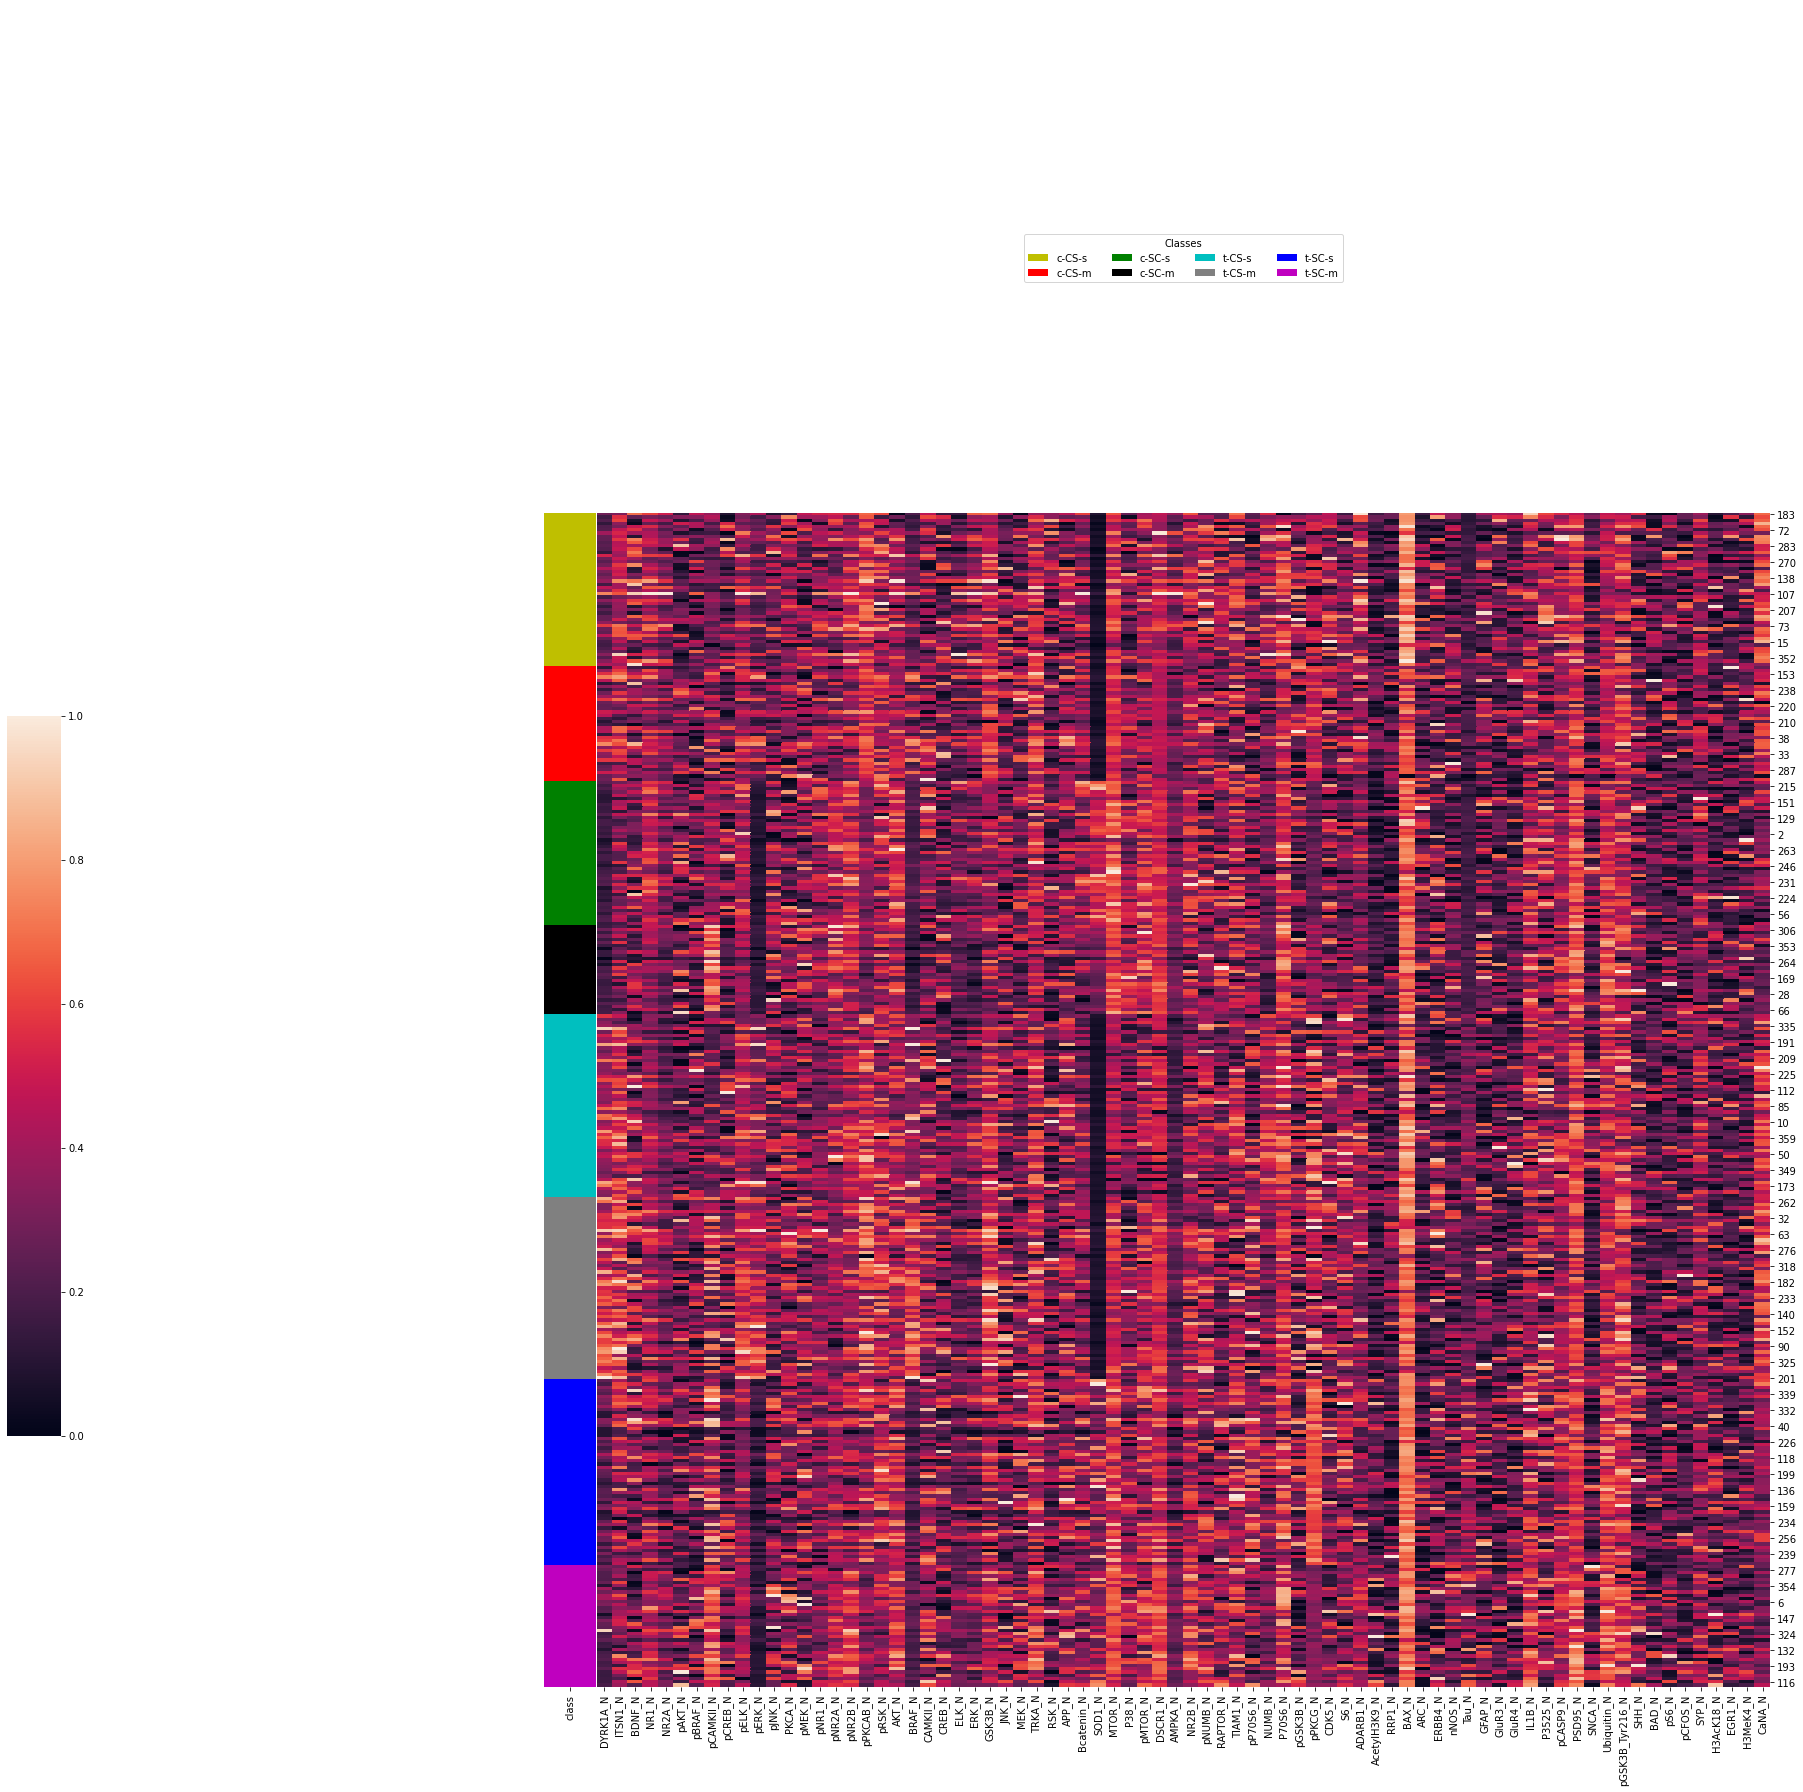

In [7]:
import pandas as pd

classes = train_data['class']
label = classes.unique()
lut1 = dict(zip(label, ('grey', 'b', 'g', 'r', 'c', 'm', 'y', 'k' )))
new_classes = pd.DataFrame(classes, columns=['class']).sort_values(by=['class'], axis=0)
row_colors = new_classes['class'].map(lut1)
c = sns.clustermap(train_sorted, metric='correlation', standard_scale=1, row_cluster = False, col_cluster=False, figsize=(25,25), cbar_pos=(0, .2, .03, .4), dendrogram_ratio=0.3, row_colors=row_colors)

class_names = {0: 'c-CS-s', 1: 'c-CS-m', 2: 'c-SC-s', 3: 'c-SC-m' , 4: 't-CS-s', 5: 't-CS-m', 6: 't-SC-s', 7: 't-SC-m'}
df = pd.DataFrame(class_names, index= [0]).to_numpy(dtype=str)
lut = dict(zip(df[0], ('y', 'r', 'g', 'k', 'c', 'grey', 'b', 'm')))
for l in df[0]:
    c.ax_col_dendrogram.bar(0, 0, color=lut[l],
                            label=l, linewidth=10)
    c.ax_col_dendrogram.legend(title='Classes',loc="center", ncol=4)

#### Feature Correlation with classes

The mice are divided into 8 classes, depending on their **genotype** (normal or trisomic) and the received **treatment** (stimulated/not stimulated and injected/not injected). Each class has a color in the clustermap, as shown in the legend.
By a visual inspection of the clustermap we can see that there are some features correlated to classes. For instance, the protein (feature) pERK_N is more expressed for the samples which belong to classes stimulated to learn(CS), either control or trisomic. Also the protein BRAF_N is correlated to the stimulated classes. 
The protein BAX_N is highly correlated to all the classes; hence it is probably encoded by a housekeeping gene.
Finally, the protein **SOD1_N** is correlated to the classes not stimulated. We can state that it is down-regulated in the context-shock, when mice are stimulated to learn.





## 1.b Features visualization 

To visualize features we have to reduce the dataset dimensionality, by performing the PCA. The features are plotted in a three-dimensional space, as the three dimensions that maximize the covariance between variables.

In [ ]:
# Target classes
y = pd.Series(train_data['class'])

In [ ]:
from sklearn.decomposition import PCA
# Define PCA with 3 components, this will transform 
pca = PCA(n_components=3)

# We consire images as simple vectors of 64 features
train_mat = np.array(train_cluster)
#train_mat = train_mat.reshape(-1, 76)
# Reduce features dimensionality, just for visualization
# purpuses
X_prj = pca.fit_transform(train_mat)



In [ ]:
# Define a function to plot the transformed features

def plot3d(X, labels):
    # Set matplotlib as interactive
    # &matplotlib inline
    # Set matplotlib to generate static images
    #%matplotlib notebook
    # This import is required to set up the 3D environment
    from mpl_toolkits.mplot3d import Axes3D
    
    pca = PCA(n_components=3)
    # We consire images as simple vectors of 64 features
    X = np.array(X)
    #X = X.reshape(-1, 76)
    # Reduce features dimensionality, just for visualization
    # purpuses
    X = pca.fit_transform(X)
    
    unique_labels = np.unique(labels)
    # Convert negative values (outliers) into positive
    labels = labels.copy()
    labels += np.abs(unique_labels.min())
    nlabels = len(unique_labels)
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111, projection='3d')
    # Define color mappings
    col = ('Dark2')
    cmap = plt.cm.get_cmap(col)
    smap = cm.ScalarMappable(
              norm=mcolors.Normalize(unique_labels.min(), unique_labels.max()+1), 
              cmap=cmap)
    # Plot the 3d coordinates (similar to standard scatter plots, we just
    # need to provide an additional z coordinate!)
    ax.scatter(xs=X_prj[:, 0], ys=X_prj[:, 1], zs=X_prj[:, 2], c=labels, cmap=cmap)
    # Plot a color bar on the right
    plt.colorbar(mappable=smap, label='classes', ticks=range(nlabels))
    print(smap)

plot3d(train_cluster, y)

The features have some labels, according to which they distributed in the new subspace. 

## 1.c Clustering

Clustering analysis is done to identify structures in the data. For each algorithm a 3d plot is shown to visualize clusters. 

### K-means with preclustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

# Hierarchical clustering to initialize centroids in a non-random way 
hmodel = AgglomerativeClustering(n_clusters=8,
                                distance_threshold=None, 
                                affinity='euclidean', linkage='single')
y_predict = hmodel.fit_predict(train_cluster)
centroids = np.stack([train_cluster[y_predict == k].mean(0) for k in range(8)])
model = KMeans(n_clusters=8, init=centroids, n_init=1, random_state=0)
y_pred_k_single = model.fit_predict(train_cluster)
plot3d(train_cluster, labels=y_pred_k_single)


hmodel_1 = AgglomerativeClustering(n_clusters=8,
                                distance_threshold=None, 
                                affinity='euclidean', linkage='complete')
y_predict = hmodel_1.fit_predict(train_cluster)
centroids = np.stack([train_cluster[y_predict == k].mean(0) for k in range(8)])
model = KMeans(n_clusters=8, init=centroids, n_init=1, random_state=0)
y_pred_k_complete = model.fit_predict(train_cluster)
plot3d(train_cluster, labels=y_pred_k_complete)

hmodel_2 = AgglomerativeClustering(n_clusters=8,
                                distance_threshold=None, 
                                affinity='euclidean', linkage='ward')
y_predict = hmodel_2.fit_predict(train_cluster)
centroids = np.stack([train_cluster[y_predict == k].mean(0) for k in range(8)])
model = KMeans(n_clusters=8, init=centroids, n_init=1, random_state=0)
y_pred_k_ward = model.fit_predict(train_cluster)
plot3d(train_cluster, labels=y_pred_k_ward)

# K-means ++ inizialization

model = KMeans(n_clusters=8, init='k-means++', random_state=0)             
y_pred_k_plus = model.fit_predict(train_cluster)

### Random k-means

In [ ]:
# Random centroids initialization
model = KMeans(n_clusters=8, init='random', random_state=0)             
y_predict_random = model.fit_predict(train_cluster)
#print("Kmeans purity", tot_purity(y_predict_random, y))

plot3d(train_cluster, labels=y_predict_random)

### Hierarchical Clustering

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate the linkage matrix
Z = linkage(train_cluster, metric='euclidean', method='ward')
#Z = linkage(train_hot, metric='euclidean', method='complete')

In [ ]:
from scipy.cluster.hierarchy import dendrogram

# Function to visualize dendrogram for hierarchical clustering

def plot_dendrogram(Z=None, model=None, X=None, **kwargs):
    annotate_above = kwargs.pop('annotate_above', 0)

    # Reconstruct the linakge matrix if the standard model API was used
    if Z is None:
        if hasattr(model, 'distances_') and model.distances_ is not None:
            # create the counts of samples under each node
            counts = np.zeros(model.children_.shape[0])
            n_samples = len(model.labels_)
            for i, merge in enumerate(model.children_):
                current_count = 0
                for child_idx in merge:
                    if child_idx < n_samples:
                        current_count += 1  # leaf node
                    else:
                        current_count += counts[child_idx - n_samples]
                counts[i] = current_count

            Z = np.column_stack([model.children_, model.distances_,
                                              counts]).astype(float)
        else:
            Z = linkage(X, method=model.linkage, metric=model.affinity)
    
    if 'n_clusters' in kwargs:
        n_clusters = kwargs.pop('n_clusters')
        # Set the cut point just above the last but 'n_clusters' merge
        kwargs['color_threshold'] = Z[-n_clusters, 2] + 1e-6
    
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111)
    # Plot the corresponding dendrogram
    ddata = dendrogram(Z, ax=ax, **kwargs) 
    
    # Annotate nodes in the dendrogram
    for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
        x = 0.5 * sum(i[1:3])
        y = d[1]
        nid = np.where(Z[:,2] == y)[0][0]
        if y > annotate_above:
            plt.plot(x, y, 'o', c=c)
            plt.annotate(str(nid-Z.shape[0]), (x, y), xytext=(0, -5),
                         textcoords='offset points',
                         va='top', ha='center')
    if kwargs['color_threshold']:
        plt.axhline(y=kwargs['color_threshold'], c='k')
    
    return fig, ax
   

In [ ]:
from sklearn.cluster import AgglomerativeClustering

methods = ['single', 'average', 'complete', 'ward']

for method in methods:
    distance_threshold=None
    n_clusters=8

    model = AgglomerativeClustering(n_clusters=n_clusters, 
                                distance_threshold=None, 
                                affinity='euclidean', linkage=method)

    y_predict = model.fit_predict(train_cluster)

    plot3d(train_cluster, labels=y_predict)
    plot_dendrogram(model=model, X=train_cluster, truncate_mode='lastp', p=100, 
                n_clusters=n_clusters, 
                color_threshold=distance_threshold)


    

The ward linkage gives the best result, so it is selected among all the possible linkages for hierarchical clustering.

In [ ]:
distance_threshold=None
n_clusters=8
model = AgglomerativeClustering(n_clusters=n_clusters, 
                                distance_threshold=None, 
                                affinity='euclidean', linkage='ward')

y_predict_ward = model.fit_predict(train_cluster)


### Clustering Evaluation

In [ ]:
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import normalize

def incidence_mat(y_pred):
    npoints = y_pred.shape[0]
    mat = np.zeros([npoints, npoints])
    # Retrieve how many different cluster ids there are
    clusters = np.unique(y_pred)
    nclusters = clusters.shape[0]
    
    for i in range(nclusters):
        sample_idx = np.where(y_pred == i)
        # Compute combinations of these indices
        idx = np.meshgrid(sample_idx, sample_idx)
        mat[idx[0].reshape(-1), idx[1].reshape(-1)] = 1
        
    return mat

def similarity_mat(X, metric):
    dist_mat = pairwise_distances(X, metric=metric)
    min_dist, max_dist = dist_mat.min(), dist_mat.max()
    
    sim_mat = 1 - (dist_mat - min_dist) / (max_dist - min_dist)
    return sim_mat

def correlation(X, y_pred, metric):
    inc = incidence_mat(y_pred)
    sim = similarity_mat(X, metric)
    
    # Note: we can eventually remove duplicate values
    # only the upper/lower triangular matrix
    # triuidx = np.triu_indices(y_pred.shape[0], k=1)
    # inc = inc[triuidx]
    # sim = sim[triuidx]
    
    inc = normalize(inc.reshape(1, -1))
    sim = normalize(sim.reshape(1, -1))
    corr = (inc @ sim.T)
    return corr[0,0]   

#### Correlation

In [ ]:
# Compute the correlation for clustering algorithms (different metrics for centroid inizialization)

corr_random = correlation(train_cluster, y_predict_random, 'euclidean')
corr_ward = correlation(train_cluster, y_pred_k_ward, 'euclidean')
corr_complete = correlation(train_cluster, y_pred_k_complete, 'euclidean')
corr_single = correlation(train_cluster, y_pred_k_single, 'euclidean')
corr_plus = correlation(train_cluster, y_pred_k_plus, 'euclidean')

corr_hierarchical = correlation(train_cluster, y_predict_ward, 'euclidean')

#### Similarity matrix

In [ ]:
def sorted_sim(sim, y_pred):
    idx_sorted = np.argsort(y_pred)
    # Sort the rows
    sim = sim[idx_sorted]
    # Sort the columns
    sim = sim[:, idx_sorted]
    
    return sim

def plot_sorted_sim(sim, y_pred):
    sim = sorted_sim(sim, y_pred)
    
    fig, ax = plt.subplots(figsize=(40,30))  
    ax = sns.heatmap(sim, ax=ax)
    # Remove ruler (ticks)
    ax.set_yticks([]) 
    ax.set_xticks([])

In [ ]:
ys= [y_pred_k_ward, y_pred_k_single, y_predict_random]
sim = similarity_mat(train_cluster, 'euclidean')

for y in ys:
    plot_sorted_sim(sim, y)

The similarity matrixes show squares along the main diagonal. They represent the clusters found in the dataset. 

#### External indexes: purity

In [ ]:
def get_Ncounts(y_predict, y_true, k, j=None):
    N = y_true.shape[0]
    Nk_mask = y_predict == k
    Nk = Nk_mask.sum()
    Nj, Nkj = None, None
    if j is not None:
        Nj_mask = y_true == j
        Nj = Nj_mask.sum()
        Nkj = np.logical_and(Nj_mask, Nk_mask).sum()
    return N, Nk, Nj, Nkj

def precision(y_predict, y_true, k, j):
    N, Nk, Nj, Nkj = get_Ncounts(y_predict, y_true, k, j)
    return Nkj / (Nk + 1e-8)
    

def purity(y_predict, y_true, k):
    cls = np.unique(y_true)
    prec = [precision(y_predict, y_true, k, j) for j in cls]
    return max(prec)

def tot_purity(y_predict, y_true):
    N = y_true.shape[0]
    nc = len(np.unique(y_true))
    p = 0
    for k in range(nc):
        N, Nk, _, _ = get_Ncounts(y_predict, y_true, k)
        pk = purity(y_predict, y_true, k)
        p += (Nk / N) * pk
    return p

In [ ]:
hierarchical = np.array([tot_purity(y_predict_ward, y), corr_hierarchical])
random_k = np.array([tot_purity(y_predict_random, y), corr_random])
single_k= np.array([tot_purity(y_pred_k_single, y), corr_single])
complete_k = np.array([tot_purity(y_pred_k_complete, y), corr_complete])
ward_k = np.array([tot_purity(y_pred_k_ward, y), corr_ward])
plus_k = np.array([tot_purity(y_pred_k_plus, y), corr_plus])

d = {'Hierarchical': hierarchical, 'Random K-mean': random_k, 'Single K-mean': single_k, 'Complete K-mean': complete_k, 'Ward K-mean': ward_k, 'K-means ++' : plus_k}

comparison = pd.DataFrame(data=d, index= ['Clustering purity', 'Correlation'])
comparison

In general all the clustering algorithms have a good purity. The best one is the random K-means.
The correlation coefficient is not so high, maybe because the choosen metric is not the ideal one.

In conclusion, there are structures in the data that allow samples to be identified based on their classes.

# 2. Classification

In [ ]:
X_full_train = train_data.drop('class', axis=1)
X_full_train = X_full_train.drop('SOD1_N', axis=1) # remove feature SOD1_N
X_full_test = test.drop('class', axis=1)
y_train = train_data['class'].to_numpy().astype(np.float32)
y_test = test['class'].to_numpy().astype(np.float32)

## 2.a Feature Selection

### Forward feature selection

The aim of the feature selection is to throw away useless features, obtaining a model with few variables that performs better. In this case we apply the forward feature selection, less time-consuming than the best subset (exhaustive exploration of all the possible models).

In [ ]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.svm import SVC

def accuracy(y_pred, y_true):
    return (y_pred == y_true).sum() / y_pred.shape[0]

def get_evaluator(scorer):
    def evaluator(model, X, y, trained=False):
        if not trained:
            model = model.fit(X, y)
        score = scorer(model, X, y)
        return model, score
    return evaluator   

def get_cv_evaluator(scorer, cv=3):
    def evaluator(model, X, y, trained=False):            
        scores = cross_val_score(model, X, y, scoring=scorer, cv=cv)
        if not trained:
            model = model.fit(X, y)
        return model, np.mean(scores)
    
    return evaluator

def get_val_evaluator(scorer, val_size=0.1):
    def evaluator(model, X, y, trained=False):
        X_train_small, X_val, y_train_small, y_val = train_test_split(X, y, 
                                                                      test_size=val_size,
                                                                      random_state=0)
        
        if not trained:
            model = model.fit(X_train_small, y_train_small)
        score = scorer(model, X_val, y_val) 
        
        return model, score
    
    return evaluator

def forward_selection(Xtrain_pd, ytrain, Xtest_pd, ytest,
                      candidates_evaluator, candidates_argbest, # Metric to be used at 2.b
                      subsets_evaluator, subsets_argbest,       # Metric to be used at 3
                      test_evaluator=None, test_argbest=None,
                      candidates_scorer_name=None,  # Name of 2. figure
                      subsets_scorer_name=None,     # Name of 3. figure
                      verbose=True, weight_step3=0):   
    test_evaluator = subsets_evaluator if not test_evaluator else test_evaluator
    test_argbest = subsets_argbest if not test_argbest else test_argbest
    
    # Global variable init
    # ====================
    num_features = Xtrain_pd.shape[-1]
    best_candidate_metric = []
    # subsets_* are lists containing one value for each Mk model (the best of the Mk candidates)
    subsets_test = []
    subsets_metric = []        # The best metric of each subset of dimension 'dim'
    subsets_best_features = [] # The best features combination in each subset of dimension 'dim'
    # A figure to keep track of candidates scores in each Mk subset
    plt.figure()
    candidate_fig = plt.subplot(111) # A global matplotlib figure
    num_evaluations = 0        # A conter to keep track of the total number of trials
    
    selected_features = []
    all_features = Xtrain_pd.columns
    
    
    # 1. Train M0
    # ===========
    model = DummyRegressor()
    # Compute (2.b) metrics
    model, score = candidates_evaluator(model, Xtrain_pd[[]], ytrain)
    best_candidate_metric.append(score)
    subsets_best_features.append([])
    _ = candidate_fig.scatter([0], [score], color="b")
    # Compute metric for step 3.
    _, score = subsets_evaluator(model, Xtrain_pd[[]], ytrain, trained=True)
    subsets_metric.append(score)
    _, score = test_evaluator(model, Xtrain_pd[[]], ytrain, trained=True)
    subsets_test.append(score)
    
    # 2. Evaluate all Mk candidates with
    #    k=0...P features
    # =========================================
    for dim in range(len(all_features)):
        candidate_metrics = [] # Keep track of candidates metrics. Will be used to select the best
        candidate_models = []  # Keep track of candidates trained models
        
        # 2.a Fixed the number of features 'dim', look at
        #     all the possible candidate models with that
        #     cardinality
        # ===============================================
        remaining_features = all_features.difference(selected_features)
        
        for new_column in remaining_features:
            Xtrain_sub = Xtrain_pd[selected_features+[new_column]].to_numpy()
            # //==========================================\\
            # || ***** Difference from previous lab ***** ||
            # \\==========================================//
            model = SVC(kernel='linear', C=10)
            model, score = candidates_evaluator(model, Xtrain_sub, ytrain)
            candidate_models.append(model)
            candidate_metrics.append(score)
            num_evaluations += 1
            
        _ = candidate_fig.scatter([Xtrain_sub.shape[-1]]*len(candidate_metrics), candidate_metrics,
                                  color="b")
            
        # 2.b Select the best candidate among those using
        #     the same number of features (2.a)
        # ===============================================
        idx_best_candidate = candidates_argbest(candidate_metrics)
        # Update selected feature
        selected_features.append(remaining_features[idx_best_candidate])
        # Save best candidate features
        best_candidate_metric.append(candidate_metrics[idx_best_candidate])
        best_features = selected_features.copy()
        subsets_best_features.append(best_features)
        
        
        # Compute metric for step 3.
        best_subset_model = candidate_models[idx_best_candidate]
        best_subset_Xtrain = Xtrain_pd[best_features].to_numpy()
        best_subset_Xtest = Xtest_pd[best_features].to_numpy()
        _, score = test_evaluator(best_subset_model, best_subset_Xtest, ytest, trained=True)
        subsets_test.append(score)
        _, score = subsets_evaluator(best_subset_model, best_subset_Xtrain, ytrain, trained=True)
        subsets_metric.append(score)
        num_evaluations += weight_step3 
        
        if verbose:
            print("............")
            print("Best model (M{}) with {} features: {}".format(dim+1, dim+1, best_features))
            print("M{} subset score (3.): {}".format(dim+1, score))
        
    # 3. Among all best candidates with increasing number
    #    of features, select the best one
    # ===================================================
    best_subset_idx = subsets_argbest(subsets_metric)
    best_features = subsets_best_features[best_subset_idx]
    
    if verbose:
        print("\n\nBest configuration has {} features".format(best_subset_idx))
        print("Features: {}".format(subsets_best_features[best_subset_idx]))
        print("Total number of trained models:", num_evaluations)
    
    # Complete the subsets_fig figure by plotting
    # a line connecting all best candidate score
    best_candidate_score_idx = candidates_argbest(best_candidate_metric)
    _ = candidate_fig.plot(range(len(best_candidate_metric)), best_candidate_metric)
    _ = candidate_fig.scatter(best_candidate_score_idx, best_candidate_metric[best_candidate_score_idx],
                              marker='X', label="Best", color="r")
    candidate_fig.set_title(candidates_scorer_name)
    candidate_fig.legend()
    
    # Plot a figure to show how te 3. metric evolves
    plt.figure()
    subsets_fig = plt.subplot(111)
    _ = subsets_fig.plot(range(len(subsets_metric)), subsets_metric, label="Selection (3.) scores")
    _ = subsets_fig.scatter(best_subset_idx, subsets_metric[best_subset_idx],
                              marker='X', label="Best (3.) score", color="r")
    best_test_score_idx = test_argbest(subsets_test)
    _ = subsets_fig.plot(range(len(subsets_test)), subsets_test, label="Test scores")
    _ = subsets_fig.scatter(best_test_score_idx, subsets_test[best_test_score_idx],
                              marker='X', label="Best test score", color="y")
    subsets_fig.set_title(subsets_scorer_name)
    subsets_fig.legend()

In [ ]:
cv = 10
forward_selection(X_full_train, y_train, X_full_test, y_test,
                  get_evaluator(make_scorer(accuracy)), np.argmax, # 2.
                  get_cv_evaluator(make_scorer(accuracy), cv), np.argmax, # 3.
                  get_evaluator(make_scorer(accuracy)), np.argmax, # test
                  candidates_scorer_name="Accuracy",
                  subsets_scorer_name="Accuracy (CV)",
                  verbose=True, weight_step3=cv)

The best model, in terms of test accuracy, has 10 features.

## 2.b Algorithms comparison

Once we selected the most important feature for the classification model, we would like to compare different classification algorithm, in order to find the one that performs better on the dataset.

In [ ]:
# Definition of classifier model

y_train = train_data['class']
X_train = train_data[['DYRK1A_N', 'pPKCG_N', 'pCAMKII_N', 'Tau_N', 'pPKCAB_N', 'NR2A_N', 'CDK5_N', 'CaNA_N', 'NUMB_N', 'AMPKA_N']]

y_test = test['class']
X_test = test[['DYRK1A_N', 'pPKCG_N', 'pCAMKII_N', 'Tau_N', 'pPKCAB_N', 'NR2A_N', 'CDK5_N', 'CaNA_N', 'NUMB_N', 'AMPKA_N']]

In [ ]:
from sklearn.linear_model import LogisticRegression             
model_logit = LogisticRegression(solver="newton-cg", penalty='none',  multi_class='auto' ,max_iter =1000) 
model_logit.fit(X_train, y_train)

train_acc_logit = accuracy(y_train, model_logit.predict(X_train))
test_acc_logit =  accuracy(y_test, model_logit.predict(X_test))

# To print directly the accuracy results

#print("Train accuracy for LR:", accuracy(y_train, model_logit.predict(X_train)))
#print("Test accuracy for LR:", accuracy(y_test, model_logit.predict(X_test)))

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
model_lda = LDA()
model_lda = LDA(store_covariance=True)
model_lda = model_lda.fit(X_train, y_train)

train_acc_lda =  accuracy(y_train, model_lda.predict(X_train))
test_acc_lda = accuracy(y_test, model_lda.predict(X_test))

#print("Train accuracy for LDA:", accuracy(y_train, model_lda.predict(X_train)))
#print("Test accuracy for LDA:", accuracy(y_test, model_lda.predict(X_test)))

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
model_qda = QDA(store_covariance=True)
model_qda = model_qda.fit(X_train, y_train)

train_acc_qda = accuracy(y_train, model_qda.predict(X_train))
test_acc_qda = accuracy(y_test, model_qda.predict(X_test))

#print("Train accuracy for QDA:", accuracy(y_train, model_qda.predict(X_train)))
#print("Test accuracy for QDA:", accuracy(y_test, model_qda.predict(X_test)))


Support vector classifier with linear kernel and high value for C (regularization term). 


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# First, try to fit a model with high C, with low regularization

model_svc = SVC(kernel='linear', C=100)
model_svc.fit(X_train, y_train)

train_acc = accuracy_score(model_svc.predict(X_train), y_train)
test_acc = accuracy_score(model_svc.predict(X_test), y_test)

print("SVM train accuracy:", train_acc)
print("SVM test accuracy:", test_acc)

#### Grid Search CV 

The aim of the grid search is to find the best parameters for the support vectors classifiers, by looking at the accuracy score for each possible combination. Four models with four different kernel function are considered and analysed.

In [ ]:
from sklearn.model_selection import GridSearchCV


# Linear

param_grid = {'C': np.linspace(0.001, 100, 5)}
svm_linear = GridSearchCV(SVC(kernel='linear'), param_grid,
                        cv=5, scoring='accuracy', refit=True)

svm_linear.fit(X_train, y_train)


# Polynomial
param_grid = {'C': np.linspace(0.001, 100, 5),
              'coef0': np.linspace(-10, 10, 5),
              'degree': [2, 3, 4]}
svm_poly = GridSearchCV(SVC(kernel='poly'), param_grid,
                        cv=5, scoring='accuracy', refit=True)
svm_poly.fit(X_train, y_train)

# RBF
param_grid = {'C': np.linspace(0.001, 100, 5),
              'gamma': np.linspace(0.001, 100, 5)}
rbf_poly = GridSearchCV(SVC(kernel='rbf'), param_grid, 
                        cv=5, scoring='accuracy', refit=True)
rbf_poly.fit(X_train, y_train)

# Sigmoid
param_grid = {'C': np.linspace(0.001, 100, 5),
              'gamma': np.linspace(0.001, 100, 5),
              'coef0': np.linspace(-10, 10, 5)}
sigm_poly = GridSearchCV(SVC(kernel='sigmoid'), param_grid, 
                         cv=5, scoring='accuracy', refit=True)
sigm_poly.fit(X_train, y_train)

In [ ]:
for m in [svm_linear,svm_poly, rbf_poly, sigm_poly]:
    cv_score = m.best_score_
    m = m.best_estimator_
    print(m)
    #sns.scatterplot(X_train[:,0], X_train[:,1], hue=y_train, marker='o')
    #sns.scatterplot(X_test[:,0], X_test[:,1], hue=y_test, marker='^')
    #plot_svm_line(m, X0_range, X1_range)
    #_ = plt.axis([X0_range[0]-0.5, X0_range[1]+0.5, X1_range[0]-0.5, X1_range[1]+0.5])
    train_acc = accuracy_score(y_train, m.predict(X_train))
    test_acc = accuracy_score(y_test, m.predict(X_test))
    print("cv score: {}".format(cv_score))
    print("train score: {}".format(train_acc))
    print("test score: {}\n".format(test_acc))

We selected the svm classifier with polynomial kernel function and C=50 (best train and test score).

In [ ]:
model_svm_poly = SVC(kernel='poly', coef0=10.0, C=50)
model_svm_poly.fit(X_train, y_train)

train_acc_svm = accuracy(y_train, model_svm_poly.predict(X_train))
test_acc_svm = accuracy(y_test, model_svm_poly.predict(X_test))

print("SVM train accuracy:", train_acc_svm)
print("SVM test accuracy:", test_acc_svm)

In the next piece of code there is the creation of a dataframe with train and test accuracy for all the models.

In [ ]:
array_logit = pd.array([train_acc_logit, test_acc_logit])
array_lda = pd.array([train_acc_lda, test_acc_lda])
array_qda = pd.array([train_acc_qda, test_acc_qda])
array_svm = pd.array([train_acc_svm, test_acc_svm])

d = {'Logistic regression': array_logit, 'LDA': array_lda, 'QDA': array_qda, 'SVM poly': array_svm}

In [ ]:
comparison = pd.DataFrame(data=d, index= ['Train score', 'Test score'])
comparison


The best algorithm in terms of accuracy is certainly the Quadratic Discriminant, with 0.95 as test score. SVM classifier has a 0.99 as train score, but the test score is worst.

### Classifier metrics evaluation

Further comparison between algorithms using some classifier metrics, such as the confusion matrix and parameters like precision, recall and F1-score, which are useful to compare the models' performance on test data.

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

### Confusion Matrix

The confusion matrix defines different categories of classified sample. On the diagonal there are the correct classified samples, while on the off-diagonal the misclassified ones.

In [ ]:
models = [model_qda, model_logit, model_lda, svm_linear, model_svm_poly]

for m in models:
    C = confusion_matrix(y_test, m.predict(X_test))
    disp = plot_confusion_matrix(m, X_test, y_test)

#QDA is the best classifier for this dataset

In [ ]:
from sklearn.metrics import classification_report

models = [model_qda, model_logit, model_lda, model_svm_poly]
target_names = ['c-CS-s', 'c-CS-m', 'c-SC-s', 'c-SC-m', 't-CS-s', 't-CS-m', 't-SC-s', 't-SC-m']
for model in models:
    print(classification_report(y_test, model.predict(X_test), target_names=target_names))

According to all the indexes, we can conclude that the Quadratic Discriminant classifier is the best algorithm for this dataset, with precision and recall equal to 0.96. Some way we expected that the assumption on Logistic Regression and Linear Discriminant were too strong for these biological data.

# 3. Regression

## 3.a Feature Selection with CV

In [ ]:
#X_full_train = train_data.drop('class', axis=1)
#X_full_train = X_full_train.drop('SOD1_N', axis=1)
y = train_data[['SOD1_N']]

Before performing the feature selection we have to split the train dataset in order to provide a test dataset for validation.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_full_train, y,
                                                    test_size=0.15, 
                                                    random_state=42)

In [ ]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.linear_model import LinearRegression

def get_evaluator(scorer):
    def evaluator(model, X, y, trained=False):
        if not trained:
            model = model.fit(X, y)
        score = scorer(model, X, y)
        return model, score
    return evaluator 


def get_sigma_scorer(metric, sigma):
    def scorer(model, X, y):
        n, d = X.shape
        y_pred = model.predict(X)
        return metric(y_pred, y, n, d, sigma)
    
    return scorer

def estimate_sigma(Xtrain_pd, ytrain):
    # Sigma is usually estimated using the model with all features
    n, p = Xtrain_pd.shape
    model = LinearRegression(fit_intercept=True)
    model.fit(Xtrain_pd, ytrain)
    y_pred = model.predict(Xtrain_pd)
    RSS = rss(y_pred, ytrain)
    RSE = np.sqrt(RSS / (n-p))
    return RSE

def rss(y_true, y_pred):
    # First we make sure the shapes are the same
    y_true = y_true.reshape(y_pred.shape)
    return np.sum((y_true - y_pred) ** 2)

sigma = estimate_sigma(X_train, y_train)

def forward_selection(Xtrain_pd, ytrain, Xtest_pd, ytest,
                      candidates_evaluator, candidates_argbest, # Metric to be used at 2.b
                      subsets_evaluator, subsets_argbest,       # Metric to be used at 3
                      test_evaluator=None, test_argbest=None,
                      candidates_scorer_name=None,  # Name of 2. figure
                      subsets_scorer_name=None,     # Name of 3. figure
                      verbose=True, weight_step3=0):   
    test_evaluator = subsets_evaluator if not test_evaluator else test_evaluator
    test_argbest = subsets_argbest if not test_argbest else test_argbest
    
    # Global variable init
    # ====================
    num_features = Xtrain_pd.shape[-1]
    best_candidate_metric = []
    # subsets_* are lists containing one value for each Mk model (the best of the Mk candidates)
    subsets_test = []
    subsets_metric = []        # The best metric of each subset of dimension 'dim'
    subsets_best_features = [] # The best features combination in each subset of dimension 'dim'
    # A figure to keep track of candidates scores in each Mk subset
    plt.figure()
    candidate_fig = plt.subplot(111) # A global matplotlib figure
    num_evaluations = 0        # A conter to keep track of the total number of trials
    
    selected_features = []
    all_features = Xtrain_pd.columns
    
    
    # 1. Train M0
    # ===========
    model = DummyRegressor()
    # Compute (2.b) metrics
    model, score = candidates_evaluator(model, Xtrain_pd[[]], ytrain)
    best_candidate_metric.append(score)
    subsets_best_features.append([])
    _ = candidate_fig.scatter([0], [score], color="b")
    # Compute metric for step 3.
    _, score = subsets_evaluator(model, Xtrain_pd[[]], ytrain, trained=True)
    subsets_metric.append(score)
    _, score = test_evaluator(model, Xtrain_pd[[]], ytrain, trained=True)
    subsets_test.append(score)
    
    # 2. Evaluate all Mk candidates with
    #    k=0...P features
    # =========================================
    for dim in range(len(all_features)):
        candidate_metrics = [] # Keep track of candidates metrics. Will be used to select the best
        candidate_models = []  # Keep track of candidates trained models
        
        # 2.a Fixed the number of features 'dim', look at
        #     all the possible candidate models with that
        #     cardinality
        # ===============================================
        remaining_features = all_features.difference(selected_features)
        
        for new_column in remaining_features:
            Xtrain_sub = Xtrain_pd[selected_features+[new_column]].to_numpy()
            model = LinearRegression(fit_intercept=True)
            model, score = candidates_evaluator(model, Xtrain_sub, ytrain)
            candidate_models.append(model)
            candidate_metrics.append(score)
            num_evaluations += 1
            
        _ = candidate_fig.scatter([Xtrain_sub.shape[-1]]*len(candidate_metrics), candidate_metrics,
                                  color="b")
            
        # 2.b Select the best candidate among those using
        #     the same number of features (2.a)
        # ===============================================
        idx_best_candidate = candidates_argbest(candidate_metrics)
        # Update selected feature
        selected_features.append(remaining_features[idx_best_candidate])
        # Save best candidate features
        best_candidate_metric.append(candidate_metrics[idx_best_candidate])
        best_features = selected_features.copy()
        subsets_best_features.append(best_features)
        
        
        # Compute metric for step 3.
        best_subset_model = candidate_models[idx_best_candidate]
        best_subset_Xtrain = Xtrain_pd[best_features].to_numpy()
        _, score = subsets_evaluator(best_subset_model, best_subset_Xtrain, ytrain, trained=True)
        subsets_metric.append(score)
        best_subset_Xtest = Xtest_pd[best_features].to_numpy()
        _, score = test_evaluator(best_subset_model, best_subset_Xtest, ytest, trained=True)
        subsets_test.append(score)
        num_evaluations += weight_step3 
        
        if verbose:
            print("............")
            print("Best model (M{}) with {} features: {}".format(dim, dim, best_features))
            print("M{} subset score (3.): {}".format(dim, score))
        
    # 3. Among all best candidates with increasing number
    #    of features, select the best one
    # ===================================================
    best_subset_idx = subsets_argbest(subsets_metric)
    best_features = subsets_best_features[best_subset_idx]
    
    if verbose:
        print("\n\nBest configuration has {} features".format(best_subset_idx))
        print("Features: {}".format(subsets_best_features[best_subset_idx]))
        print("Total number of trained models:", num_evaluations)
    
    # Complete the subsets_fig figure by plotting
    # a line connecting all best candidate score
    best_candidate_score_idx = candidates_argbest(best_candidate_metric)
    _ = candidate_fig.plot(range(len(best_candidate_metric)), best_candidate_metric)
    _ = candidate_fig.scatter(best_candidate_score_idx, best_candidate_metric[best_candidate_score_idx],
                              marker='X', label="Best", color="r")
    candidate_fig.set_title(candidates_scorer_name)
    candidate_fig.legend()
    
    # Plot a figure to show how te 3. metric evolves
    plt.figure()
    subsets_fig = plt.subplot(111)
    _ = subsets_fig.plot(range(len(subsets_metric)), subsets_metric, label="Selection (3.) scores")
    _ = subsets_fig.scatter(best_subset_idx, subsets_metric[best_subset_idx],
                              marker='X', label="Best (3.) score", color="r")
    best_test_score_idx = test_argbest(subsets_test)
    _ = subsets_fig.plot(range(len(subsets_test)), subsets_test, label="Test scores")
    _ = subsets_fig.scatter(best_test_score_idx, subsets_test[best_test_score_idx],
                              marker='X', label="Best test score", color="y")
    subsets_fig.set_title(subsets_scorer_name)
    subsets_fig.legend()

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

def get_cv_evaluator(scorer, cv=3):
    def evaluator(model, X, y, trained=False):            
        scores = cross_val_score(model, X, y, scoring=scorer, cv=cv)
        if not trained:
            model = model.fit(X, y)
        return model, np.mean(scores)
    
    return evaluator

def get_val_evaluator(scorer, val_size=0.1):
    def evaluator(model, X, y, trained=False):
        X_train_small, X_val, y_train_small, y_val = train_test_split(X, y, 
                                                                      test_size=val_size,
                                                                      random_state=42)
        
        if not trained:
            model = model.fit(X_train_small, y_train_small)
        score = scorer(model, X_val, y_val) 
        
        return model, score
    
    return evaluator

In [ ]:

sigma = estimate_sigma(X_train, y_train)
forward_selection(X_train, y_train, X_test, y_test,
                  get_evaluator(make_scorer(r2_score)), np.argmax, # 2.b
                  get_cv_evaluator(make_scorer(r2_score), cv=5), np.argmax, # 3.
                  get_evaluator(make_scorer(r2_score)), np.argmax, # test
                  candidates_scorer_name="cv(R^2)",
                  subsets_scorer_name="cv(R^2)",
                  verbose=True, weight_step3=10)

The best resulting model after feature selection is the one with 20 features. Indeed, it shows the best test R^2. 

## 3.b Training and prediction

In [ ]:
X = train_data[['pERK_N', 'Bcatenin_N', 'pPKCAB_N', 'Tau_N', 'MTOR_N', 'AMPKA_N', 'pELK_N', 'AKT_N', 'pPKCG_N', 'ADARB1_N', 'nNOS_N', 'DSCR1_N', 'pNR2A_N', 'BRAF_N', 'CAMKII_N', 'ERK_N', 'EGR1_N', 'BAX_N', 'CaNA_N', 'DYRK1A_N']]

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

model = LinearRegression(fit_intercept=True)    
model.fit(X, y)                                    
y_predict = model.predict(X) 

print("R2 score ", r2_score(y, y_predict))
print("MSE score ", mean_squared_error(y, y_predict))

In [ ]:
# Random splitting of training dataset into test and train 
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3, 
                                                    random_state=15)

model = LinearRegression(fit_intercept=True).fit(X_train, y_train) # training phase of the model 
                    
y_predict_test = model.predict(X_test) # prediction of the model both on test and train subsets
y_predict_train = model.predict(X_train)


print("Train R2 score ", r2_score(y_train, y_predict_train))
print("Train MSE score ", mean_squared_error(y_train, y_predict_train))

print("Test R2 score ", r2_score(y_test, y_predict_test))
print("Test MSE score ", mean_squared_error(y_test, y_predict_test))

### Polynomial regressor

Instead of fitting a linear model, we can perform a grid search in order to find the best degree of a polynomial model. For each degree are computed train and test scores as a mean value of 5-fold cross-validation. 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

r2_scorer = make_scorer(r2_score,
                        greater_is_better=True)

# Validation
model = Pipeline([('poly', PolynomialFeatures(degree=list(range(1,5)), include_bias=False)),
                  ('linear', LinearRegression(fit_intercept=True))])

# Select parameters to optimize
parameters = {'poly__degree': list(range(1,5))}

cv = GridSearchCV(model, parameters, scoring=r2_scorer, cv=5)
cv.fit(X_train, y_train)

model = cv.best_estimator_
y_predict = model.predict(X_test)
test_score = r2_score(y_test, y_predict)

print("Best degree:", cv.best_params_['poly__degree'])
print("Train score:", cv.best_score_)
print("Test score:", test_score)

The best resulting polynomial regressor has degree = 1, with test score = 0.76. It is exactly the linear regressor, so a linear model can explain better the data.

### Lasso CV

Alternative way of performing feature selection is with the Lasso penalization, which constrains Beta parameters to be equal to 0. 

In [ ]:
from sklearn.model_selection import train_test_split

# Split the training dataset by using all the features 
X_full = train_data.drop('class', axis = 1)
X_full = X_full.drop('SOD1_N', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_full, y,
                                                    test_size=0.3, 
                                                    random_state=42)
y_train = y_train.to_numpy().ravel()
y_test = y_test.to_numpy().ravel()

In [ ]:
from sklearn.linear_model import LassoCV

model_lasso = LassoCV(cv=10, random_state=42)
model_lasso.fit(X_train, y_train)

y_predict_test = model_lasso.predict(X_test)
y_predict_train = model_lasso.predict(X_train)


print("Train R2 score ", r2_score(y_train, y_predict_train))
print("Train MSE score ", mean_squared_error(y_train, y_predict_train))

print("Test R2 score ", r2_score(y_test, y_predict_test))
print("Test MSE score ", mean_squared_error(y_test, y_predict_test))

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

r2_scorer = make_scorer(r2_score,
                        greater_is_better=True)

score = cross_val_score(model_lasso, X_test, y_test, scoring=r2_scorer, cv=10) # scores for 10-fold cv

val_score = np.mean(score)
val_score

Comparing R^2 and MSE values between regressors obtained after forward selection and lasso selection, we can say that the forward selection gives the features that result in a better prediction.

# 4. SOD1_N prediction

## 4.a Test prediction

In [ ]:
X_final_test = test[['pERK_N', 'Bcatenin_N', 'pPKCAB_N', 'Tau_N', 'MTOR_N', 'AMPKA_N', 'pELK_N', 'AKT_N', 'pPKCG_N', 'ADARB1_N', 'nNOS_N', 'DSCR1_N', 'pNR2A_N', 'BRAF_N', 'CAMKII_N', 'ERK_N', 'EGR1_N', 'BAX_N', 'CaNA_N', 'DYRK1A_N']]
test['SOD1_N'] = model.predict(X_final_test)

## 4.b Test performance of QDA classifier

In [ ]:
y_train = train_data['class']
X_train = train_data[['SOD1_N','DYRK1A_N', 'pPKCG_N', 'pCAMKII_N', 'Tau_N', 'pPKCAB_N', 'NR2A_N', 'CDK5_N', 'CaNA_N', 'NUMB_N', 'AMPKA_N']]

y_test = test['class']
X_test = test[['SOD1_N','DYRK1A_N', 'pPKCG_N', 'pCAMKII_N', 'Tau_N', 'pPKCAB_N', 'NR2A_N', 'CDK5_N', 'CaNA_N', 'NUMB_N', 'AMPKA_N']]

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

model_qda_sod1 = QDA(store_covariance=True)
model_qda_sod1 = model_qda_sod1.fit(X_train, y_train)

print("Train accuracy for QDA:", accuracy(y_train, model_qda_sod1.predict(X_train)))
print("Test accuracy for QDA:", accuracy(y_test, model_qda_sod1.predict(X_test)))

### Confusion matrix

In [ ]:
C = confusion_matrix(y_test, model_qda_sod1.predict(X_test))
disp = plot_confusion_matrix(model_qda_sod1, X_test, y_test)

In [ ]:
print(classification_report(y_test, model_qda_sod1.predict(X_test), target_names=target_names))

If we add SOD1_N to train the classifier and predict classes, all the parameters, such as accuracy, precision and recall, go down. 

##### SOD1_N  improves the classification performance on train dataset, but the prediction on the test dataset is poorer, maybe because the predicted values by the regressor are not very close to the real ones, given a test R^2 = 0.75. As expected, it seems that SOD1_N would increase the general performance, because it is the feature which most correlates with classes. Knowing the real values in the test dataset, it would be possible to build a better classifier. 